<font  style = "font-weight: bold; color:blue; font-size:2.5em;">EDA & Data Preprocessing on Google App Store Rating Dataset.

## Domain: Mobile device apps

## Content :

The Play Store apps data has enormous potential to drive app-making businesses to success. However, many
apps are being developed every single day and only a few of them become profitable. It is important for
developers to be able to predict the success of their app and incorporate features which makes an app
successful. Before any such predictive-study can be done, it is necessary to do EDA and data-preprocessing on
the apps data available for google app store applications. From the collected apps data and user ratings from
the app stores, let's try to extract insightful information

## Objective:

 The Goal is to explore the data and pre-process it for future use in any predictive analytics study.

### Attribute Description
1. App : Application name
2. Category : Category the app belongs to.
3. Rating : Overall user rating of the app
4. Size : Size of the app
5. Installs : Number of user reviews for the app
6. Type : Paid or Free
7. Price Price of the app
8. Content Rating : Age group the app is targeted at - children/Mature 21+ /Adult
Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited. 1
9. Genres : An app can belong to multiple genres (apart from its main category). For eg. a
musical family game will belong to Music, Game, Family genres.
10. Last Updated : Date when the app was last updated on play store.
11. Current Ver :  Current version of the app available on play store.
12. Android Ver :  Min required Android Version.


<font  style = "font-weight: bold;  font-size:1.9em;">1. Import required libraries and read the dataset.</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# importing and displaying dataset
df = pd.read_csv('Google_playstore_Apps_data.csv')
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


<font  style = "font-weight: bold;  font-size:1.9em;">2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.</font>

In [3]:
# extracting some sample from the Dataset
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8656,"Time Planner - Schedule, To-Do List, Time Tracker",PRODUCTIVITY,4.2,2537,8.5M,"500,000+",Free,0,Everyone,Productivity,"January 10, 2018",2.2 (Protostar),4.0 and up
1008,"StubHub - Tickets to Sports, Concerts & Events",EVENTS,4.0,26089,Varies with device,"5,000,000+",Free,0,Everyone,Events,"August 2, 2018",4.2.1,Varies with device
5805,Knife&Axe Throwing,GAME,3.1,440,9.1M,"50,000+",Free,0,Everyone,Arcade,"November 26, 2012",1.0.6,2.1 and up
3504,Todoist: To-do lists for task management & err...,PRODUCTIVITY,4.5,155999,12M,"10,000,000+",Free,0,Everyone,Productivity,"August 5, 2018",12.8.2,4.4 and up
2267,Pocket Lab Values,MEDICAL,4.3,214,899k,"10,000+",Paid,$2.99,Everyone,Medical,"November 22, 2012",2.5,2.1 and up
5133,AH Connect (Adventist Health),HEALTH_AND_FITNESS,3.4,5,59M,"1,000+",Free,0,Everyone,Health & Fitness,"January 23, 2018",3.5.1,4.4 and up
5932,Elif Ba - Learn The Holy Quran,FAMILY,4.8,1491,38M,"50,000+",Free,0,Everyone,Education,"October 31, 2017",1.3,4.1 and up
6117,CE BF,LIFESTYLE,NaN,0,24M,50+,Free,0,Everyone,Lifestyle,"January 2, 2018",1.0.1,4.1 and up
10727,Fon WiFi App – WiFi Connect,TOOLS,4.1,222,16M,"50,000+",Free,0,Everyone,Tools,"July 26, 2018",2.2.4,4.4 and up
2035,Kids Educational :All in One,FAMILY,4.5,1455,8.9M,"500,000+",Free,0,Everyone,Education;Education,"February 1, 2018",2.7,2.3 and up


In [4]:
# cheking the shape of the dataset
df.shape

(10841, 13)

10841 Rows and
13 columns

In [5]:
# getting information of dataset  by using info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


All Variables are in Object DataType except **Rating** Variable 

In [6]:
# Returning a Series with number of distinct elements, by ignoring nan
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [7]:
# checking NUll values in dataset
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<font  style = "font-weight: bold; font-size:1.9em;">3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.</font>

In [8]:
# cheking summary statistics of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
# cheking summary statistics of the dataset
df.describe(include = 'O').transpose()

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


* columns that are need to be worked upon
  * Reviews --> has to convert Object DataType to Interger DataType
  * Size --> Size variable have to be clean, remove the M,K and impute the 'Varies with divice
  * Installs --> clean Installs variable by reomving '+'
  * Price --> clean Price variable,have to be convert Object DataType to Numeric datatype
  * Rating --> we should remove nan
  * Genres --> have to drop Genred variable
  * Content Rating --> have to encode the data for mmodel bulding
  * Last Updated --> have to convert to datatime datatype
  * Current Ver --> have to drop this column

<font  style = "font-weight: bold;  font-size:1.9em;">4. Check if there are any duplicate records in the dataset? if any drop them

In [10]:
# checking for Duplicates
df.duplicated().sum()

483

In [11]:
# Droping Duplicate values
df.drop_duplicates(keep = 'first', inplace = True)
df.shape

(10358, 13)

In [12]:
# checking if there are any duplicates presesent
df.duplicated().sum()

0

successfully removed duplicates

<font  style = "font-weight: bold; font-size:1.9em;">5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [13]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [14]:
# there is a invalid category and that is 1.9
df['Category'].value_counts()

Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [15]:
# dropping 1.9 value 
df.drop(df[df['Category'] == '1.9'].index,inplace = True)

In [16]:

df['Category'] = df['Category'].astype('object')

In [17]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

<font  style = "font-weight: bold; ; font-size:1.9em;"> 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low))

In [18]:
# checking  is there are any null values present in Rating Column
df['Rating'].isnull().sum()

1465

In [19]:
# dropping the null values from Rating Column
df.dropna(subset = ['Rating'],inplace = True)


In [20]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [21]:
# creating New column 'Rating_category' with values High if raring is grater than 3.5, and if less then Low 
df['Rating_category']= np.where(df['Rating'] > 3.5, 'High','Low')

In [22]:
df['Rating_category'].unique()

array(['High', 'Low'], dtype=object)

In [23]:
df.dtypes

App                 object
Category            object
Rating             float64
Reviews             object
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating_category     object
dtype: object

<font  style = "font-weight: bold; font-size:1.9em;"> 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [24]:
Plotting = df['Rating_category'].value_counts()
Plotting

Rating_category
High    8012
Low      880
Name: count, dtype: int64

In [25]:
# converting output value to Percentage(%)

In [26]:
High_Rating = df['Rating_category'].value_counts()['High'] / df['Rating_category'].shape[0] * 100
Low_Rating  = df['Rating_category'].value_counts()['Low'] / df['Rating_category'].shape[0] *100

In [27]:
print("High : ",High_Rating)
print("Low : ",Low_Rating)

High :  90.10346378767431
Low :  9.896536212325687


In [28]:
Names = 'High','Low'

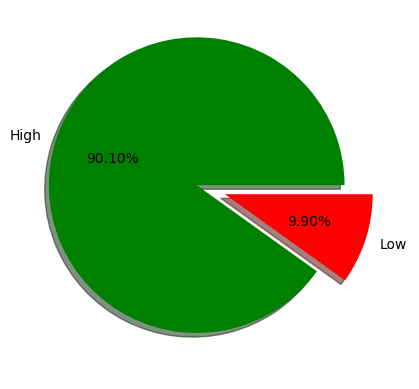

In [29]:
# making a pie chart to see the distribution of data
plt.pie(Plotting, labels = Names,colors =["g","r"], autopct="%1.2f%%",explode = (0.2,0),shadow=True)
plt.show()

App Rating are more than 3.5 Rating is (90%),
App Rating are less than 3.5 Rating is (10%),least people likes.it means most apps have good Rating

<font  style = "font-weight: bold;  font-size:1.9em;"> 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation))

In [30]:
df1 = df.copy()

In [31]:
# there was a 1 value to be clean as i done below
df1['Reviews'] = df1['Reviews'].replace({'3.0M':3000000},regex = True).astype('int')

C:\Users\ABHISHEK S R\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<AxesSubplot: ylabel='Reviews'>

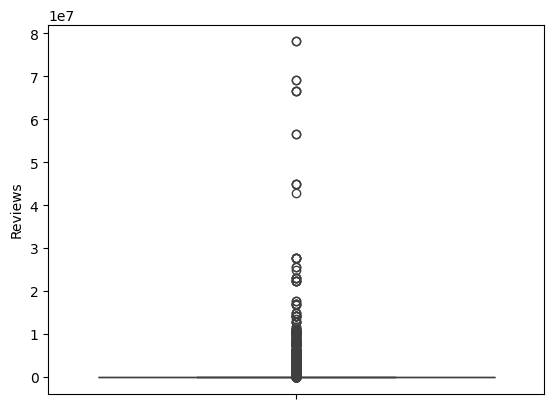

In [32]:
sns.boxplot(df1['Reviews'])

In [33]:
df1['Reviews']=pd.to_numeric(df1['Reviews'])

In [34]:
# removing outliers using Z score Method

In [35]:
df_mean = df1['Reviews'].mean()
df_std = df1['Reviews'].std()
z = (df1['Reviews'] - df_mean)/df_std
z

0       -0.162688
1       -0.162410
2       -0.132619
3       -0.088512
4       -0.162410
           ...   
10834   -0.162740
10836   -0.162730
10837   -0.162741
10839   -0.162704
10840   -0.025634
Name: Reviews, Length: 8892, dtype: float64

In [36]:
threshold=3
df1=df1[z<threshold]

In [37]:
len(df1)

8800

<font  style = "font-weight: bold;  font-size:1.9em;"> 9.  The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')


In [38]:
# i droped a 'Varies with device' for model building
df1.drop(df1[df1['Size'] == 'Varies with device'].index,inplace = True)

In [39]:
# replacing all 'k', 'M' from the Size column, i cleaned as you can see
df1['Size'] = df1['Size'].replace({'k': '*1000','M': '*1000000'},regex = True).map(eval)

In [40]:
df1["Size"] = df1["Size"].astype("float64")

In [41]:
df1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating_category     object
dtype: object

<font  style = "font-weight: bold;  font-size:1.9em;">10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type. 


In [42]:
df1['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7377, dtype: object

In [43]:
# cleaning Installs column 
df1['Installs'] = df1['Installs'].replace({'\,': '', '\+': ''},regex = True)
df1['Installs'] = df1['Installs'].astype('int')

In [44]:
df1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int32
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating_category     object
dtype: object

<font  style = "font-weight: bold;  font-size:1.9em;">11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type. 

In [45]:
df1['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [46]:
# cleaning the Price column and converting Object DataType to float datatype
df1['Price'] = df1['Price'].replace({'\$' : ''},regex = True)
df1['Price'] = df1['Price'].astype('float')

In [47]:
df1['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [48]:
df1['Price'].dtype

dtype('float64')

<font  style = "font-weight: bold;  font-size:1.9em;">12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)


In [49]:
# dropping unwanted columns
redundant_columns = ['App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver']

In [50]:
df1.drop(redundant_columns, axis = 1, inplace =True)

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7377 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7377 non-null   object 
 1   Reviews          7377 non-null   int32  
 2   Size             7377 non-null   float64
 3   Installs         7377 non-null   int32  
 4   Type             7377 non-null   object 
 5   Price            7377 non-null   float64
 6   Content Rating   7377 non-null   object 
 7   Rating_category  7377 non-null   object 
dtypes: float64(2), int32(2), object(4)
memory usage: 461.1+ KB


In [52]:
df1.isnull().sum()

Category           0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Rating_category    0
dtype: int64

<font  style = "font-weight: bold;  font-size:1.9em;">13. Encode the categorical columns.  

In [53]:
df1.describe(include = 'O')

,Category,Type,Content Rating,Rating_category
count,7377,7377,7377,7377
unique,33,2,6,2
top,FAMILY,Free,Everyone,High
freq,1585,6830,5928,6552


In [54]:
df1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [55]:
df1['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [56]:
df1['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [57]:
df1['Rating_category'].unique()

array(['High', 'Low'], dtype=object)

In [58]:
# get_dummies is used as a OneHotEncoding
df1=pd.get_dummies(df1,columns=(["Category","Content Rating"]))

In [59]:
df1["Rating_category"]=df1["Rating_category"].apply(lambda x:1 if x=="high" else 0)
df1['Type'] = df1['Type'].apply(lambda x:1 if x=="Free" else 0)

In [60]:
df1

,Reviews,Size,Installs,Type,Price,Rating_category,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,159,19000000.0,10000,1,0.0,0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,967,14000000.0,500000,1,0.0,0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,87510,8700000.0,5000000,1,0.0,0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,215644,25000000.0,50000000,1,0.0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,967,2800000.0,100000,1,0.0,0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,44,619000.0,1000,1,0.0,0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
10834,7,2600000.0,500,1,0.0,0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
10836,38,53000000.0,5000,1,0.0,0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
10837,4,3600000.0,100,1,0.0,0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


<font  style = "font-weight: bold;  font-size:1.9em;">14. Segregate the target and independent features (Hint: Use Rating_category as the target) 

In [61]:
X=df1.drop(["Rating_category"],axis=1)
X

,Reviews,Size,Installs,Type,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,159,19000000.0,10000,1,0.0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,967,14000000.0,500000,1,0.0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,87510,8700000.0,5000000,1,0.0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,215644,25000000.0,50000000,1,0.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,967,2800000.0,100000,1,0.0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,44,619000.0,1000,1,0.0,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
10834,7,2600000.0,500,1,0.0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
10836,38,53000000.0,5000,1,0.0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
10837,4,3600000.0,100,1,0.0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [62]:
y=df1["Rating_category"]

<font  style = "font-weight: bold; font-size:1.9em;">15. Split the dataset into train and test. 


In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=555)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5532, 44)
(1845, 44)
(5532,)
(1845,)


<font  style = "font-weight: bold;  font-size:1.9em;">16. Standardize the data, so that the values are within a particular range.

* using MinMaxScaler this method will tansform each value in the column proportionally within the range [0,1]  

In [64]:
model=MinMaxScaler()
df2 =pd.DataFrame(model.fit_transform(df1),columns=df1.columns)

In [65]:
df2.head()

,Reviews,Size,Installs,Type,Price,Rating_category,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0.000018,0.189931,0.00001,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000108,0.139927,0.00050,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.009806,0.086922,0.00500,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.024165,0.249936,0.05000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000108,0.027917,0.00010,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
